# Tutorial

## Initialize

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import yahoo_fin.stock_info as si

# private module to use yahoo_fin
import mystock_info as mi

##
import importlib
importlib.reload(mi)

<module 'mystock_info' from '/home/jovyan/yahoo_fin/mystock_info.py'>

## Overview

This module calls yahoo_fin functions and returns the results by a dataframe. 

**Remarks:** **The downloaded data is cached,** and automatically loaded from the cache if you have new one. The cache is valid for 24 hours in default, but you can change it.

### Download and plot EPS history

- `get_earnings_history()`
- `search_good_eps()`

### Find tickers with high EPS beat ratio

- `search_good_eps()`
- `show_beat_ratio()`

### Download and plot valuation data

- `get_valuation_data()`
- `plot_valuation()`

### In a nut shell

- `get_all_data(tickers, last=20, table=True)`

## Download and plot EPS history

###  plot_eps(tickers, clear_cache=1, last=20, largefig=False, verbose=False)
- This function plots EPS history.
- It calls `get_earnings_history()` (see below) inside the function and returns the obtained dataframe.
- arguments:
    - `tickers`: list of tickers (list) or a ticker name (string)
    - `clear_cache`: number of days cache should be kept

### screening_eps(tickers, last=20, threshold=80, min_qtrs=4, clear_cache=False, verbose=False)

- You can find good tickers based on the EPS beat ratio 
- get EPS history data for `tickers` and shows tickers with EPS beat ratio >= `threshold` within `last` quarters and with at least `min_qtrs` EPS data.
- return value:
    - combined dataframe of get_earnings_history() for all `tickers`, i.e.,
    ```
    for i in tickers:
        tmp=get_earnings_history(i)
        df=df.append(tmp)
    ``` 
- arguments:
    - `last`: number of quarters to be considred
    - `min_qtrs`: number of quarters required for evaluation
    - `clear_cache`: number of days of preserving cache. Set False if you want to use cache despite the creation date.
    - `threshold`: minimum EPS beat ratio in `last` quarters

### get_earnings_history(tickers, clear_cache=1, verbose=False)

- This function download EPS history data and returns the dataframe.
- Usually you don't need to call this function by yourself.
- front end of [yahoo_fin.stock_info.get_earnings_history()](http://theautomatic.net/yahoo_fin-documentation/#get_earnings_history) 
- arguments:
    - `tickers`: list of tickers or string of a ticker
    - `clear_cache`: number of days cache should be kept    

ntick: 5, nrow: 2, ncol: 4


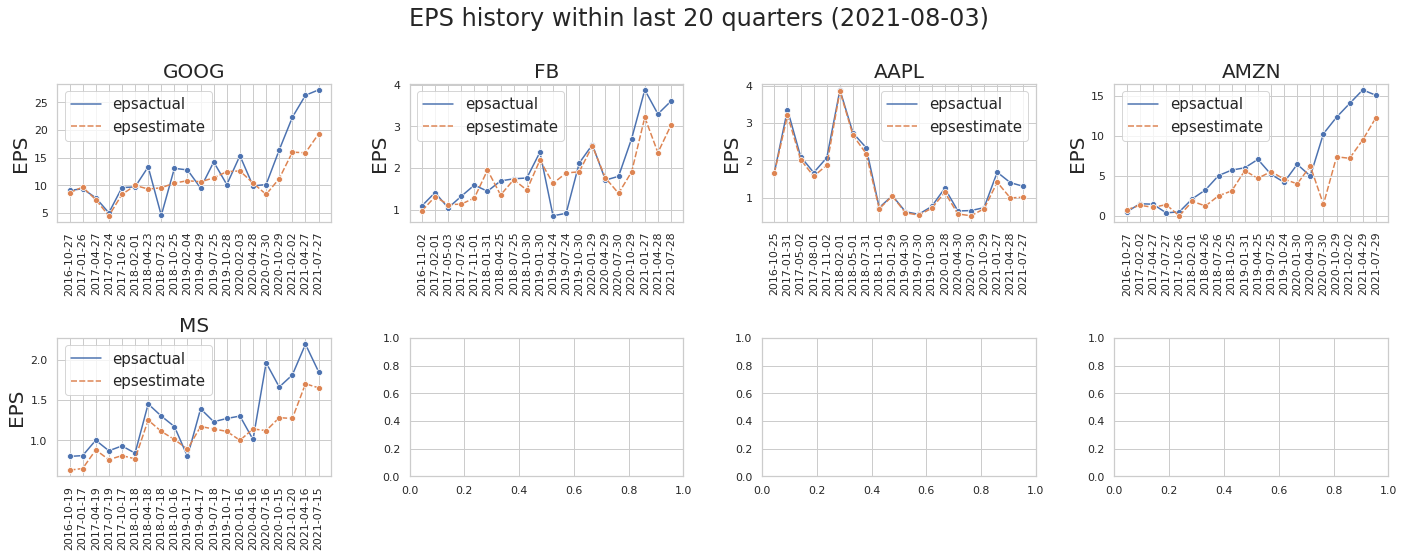

EPS beat ratio (%) within last 20 quarters (2021-08-03)


,,beat ratio,beat,count
ticker,companyshortname,,,
AAPL,Apple Inc.,100.0,20,20
MS,Morgan Stanley,90.0,18,20
AMZN,"Amazon.com, Inc.",75.0,15,20
FB,"Facebook, Inc.",75.0,15,20
GOOG,Alphabet Inc.,70.0,14,20


Tickers list of which beat ratio >= 80% within last 20 quarters
(data with more than 4 quarter EPSs)


,,beat ratio,beat,count
ticker,companyshortname,,,
AAPL,Apple Inc.,100.0,20,20
MS,Morgan Stanley,90.0,18,20


In [2]:
gafam=["GOOG","FB","AAPL","AMZN","MS"]

mi.plot_eps(gafam,last=20,largefig=False)
ret=mi.screening_eps(gafam,threshold=False)
ret=mi.screening_eps(gafam, last=20, threshold=80, min_qtrs=4)

If you prefer larger graphs, set the argument `largefig=True` in `plot_eps()`.

ntick: 1, nrow: 1, ncol: 1


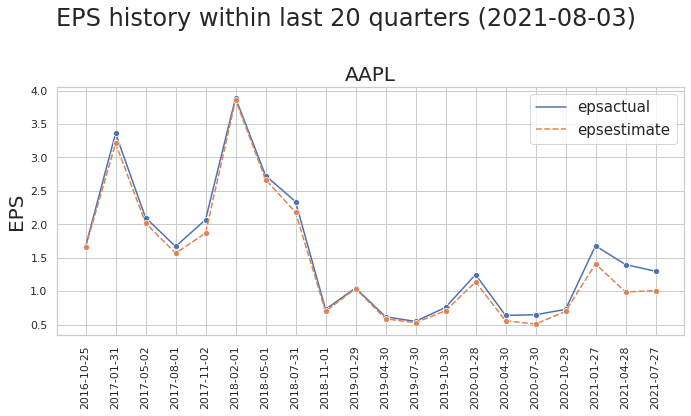

,ticker,companyshortname,startdatetime,startdatetimetype,epsestimate,epsactual,epssurprisepct,timeZoneShortName,gmtOffsetMilliSeconds,quoteType
1,AAPL,Apple Inc.,2021-07-27,TNS,1.01,1.30,29.10,EDT,0,EQUITY
2,AAPL,Apple Inc.,2021-04-28,TNS,0.99,1.40,41.84,EDT,0,EQUITY
3,AAPL,Apple Inc.,2021-01-27,TNS,1.41,1.68,18.98,EDT,0,EQUITY
4,AAPL,Apple Inc.,2020-10-29,TNS,0.70,0.73,4.29,EDT,0,EQUITY
5,AAPL,Apple Inc.,2020-07-30,TNS,0.51,0.65,26.22,EDT,0,EQUITY
...,...,...,...,...,...,...,...,...,...,...
95,AAPL,Apple Inc.,1996-07-17,TNS,-0.04,-0.02,51.62,EDT,0,EQUITY
96,AAPL,Apple Inc.,1996-04-17,TNS,-0.05,-0.07,-40.60,EDT,0,EQUITY
97,AAPL,Apple Inc.,1996-01-17,TNS,-0.01,-0.02,-58.60,EDT,0,EQUITY
98,AAPL,Apple Inc.,1995-10-18,TNS,0.02,0.02,-8.00,EDT,0,EQUITY


In [3]:
mi.plot_eps("AAPL",largefig=True)

## Download and plot valuation data

You can get valuation data including PSR, PBR, and PER using `get_valuation_data()` and can plot the distribution of PSRs using `plot_valuation()`.

### plot_valuation(df, hist=True, table=True, key="PSR"):
- Plot histogram of PSR(default) distribution and print the PSR ranking.
- This function calls `get_valuation_data()` (see below) inside the function and retunrs the obtained dataframe.
- Sorting key can be 
    - "PSR" : Price to Sales Ratio
    - "PBR" : Price Book-value Ratio
    - "PER" : Price Earning Ratio
    - "EPS" : Earning Per Share
    - "Cap" : Market Cap --- Currently sorting doesn't work
- return value:
    - dataframe sorted by the given key
- arguments:
    - `tickers`: list of tickers (list) or a ticker name (string)
   
### get_valuation_data(tickers, clear_cache=7, verbose=False)
- download valuation data including PSR, PBR, Pand ER using [`yahoo_fin.stock_info.get_quote_table()`](http://theautomatic.net/yahoo_fin-documentation/#get_quote_table) and [`yahoo_fin.stock_info.get_stats_valuation()`](http://theautomatic.net/yahoo_fin-documentation/#get_stats_valuation), and returns the combined dataframe.
- Usually you don't need to call this function explicitly.
- return value:
    - dataframe of the valuation data of `tickers`
    

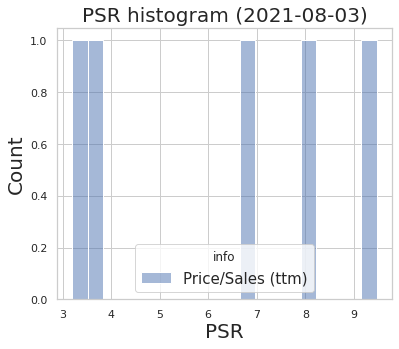

PSR sorted list (<function today at 0x7f7e9f2ab0d0>)


info,Market Cap,Previous Close,1y Target Est,Price/Sales (ttm),PE Ratio (TTM),Price/Book (mrq),Earnings Date
Ticker,,,,,,,
FB,9.927250e+11,351.95,386.47,9.47,26.15,7.20,"Oct 27, 2021 - Nov 01, 2021"
GOOG,1.809000e+12,2719.79,2625.00,8.21,29.48,7.64,NaN
AAPL,2.404000e+12,145.52,159.34,6.93,28.47,37.48,"Oct 27, 2021 - Nov 01, 2021"
AMZN,1.679000e+12,3331.48,4241.33,3.79,57.99,14.67,"Oct 27, 2021 - Nov 01, 2021"
MS,1.769810e+11,96.23,98.53,3.20,12.79,1.83,"Oct 13, 2021 - Oct 18, 2021"


In [5]:
df_psr_sorted = mi.plot_valuation(gafam, hist=True, table=True)

# Download and plot revenue data

## def plot_revenue(tickers, clear_cache=7, verbose=False):

- Plot revenue data 
- This function get revenue data using `si.get_earnings()` (see below) and returns it in dict format.


## def get_revenue(tickers, clear_cache=7, verbose=False):

- get revenue data using `si.get_earnings()` and returns it in dict format.
return value:
- dict of which keys are 'quarterly_results', 'yearly_revenue_earnings', and  'quarterly_revenue_earnings' and values are dataframe for `tickers`.

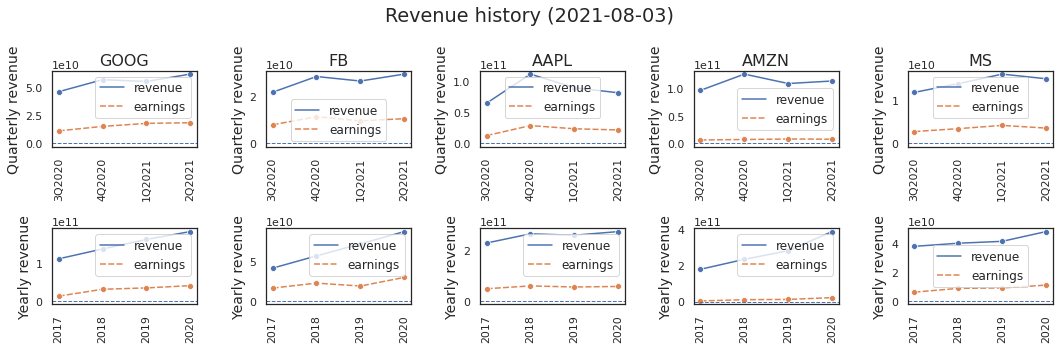

In [6]:
ret=mi.plot_revenue(gafam)

## In a nut shell

**Attention: Under construction from here**

You can get both of EPS history and valuation data by `mi.get_all_data()`.

### get_all_data(tickers, last=20, table=True)
- run the following
    1. download EPS history (`get_earnings_history()`))
    2. download valuation data (`get_valuation_data()`)
    3. shows the EPS beat ratios in 'last' quarters (`show_beat_ratio()`)
- arguments:
    - `tickers`: list of tickers 
    - `last=20`: number of quarters to be considred to get EPS beat ratio
    - `table=False`: show the table of EPS beat ratio or not
- return value: tuple of return values of `get_earnings_history()` and `get_valuation_data()`

ntick: 5, nrow: 2, ncol: 4


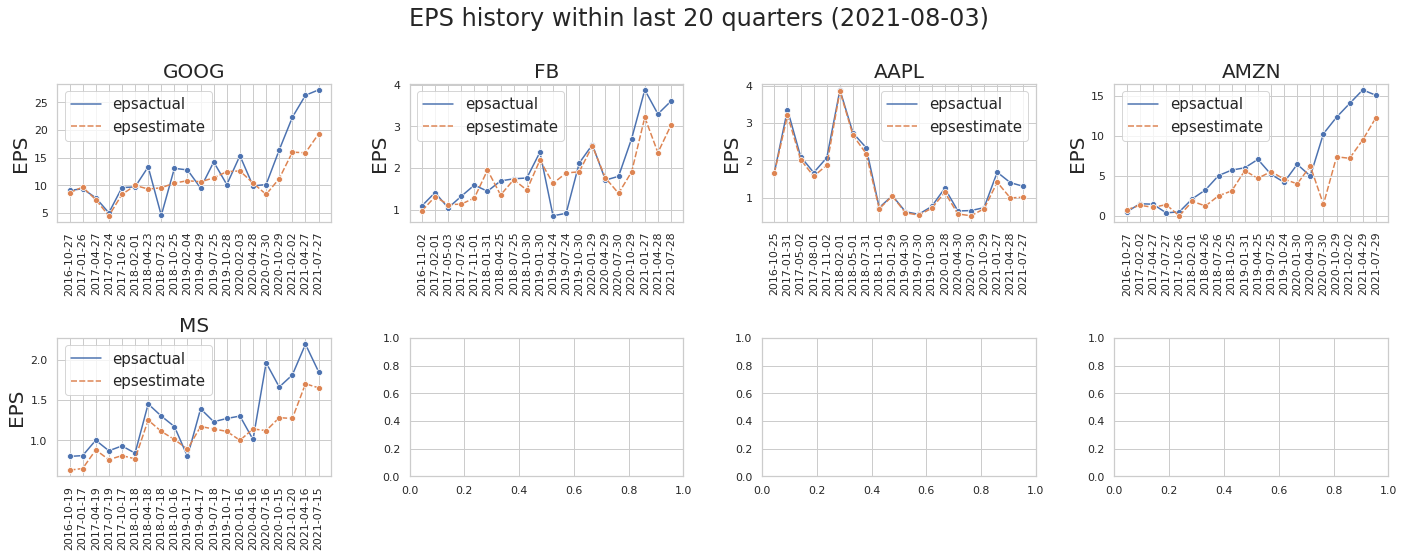

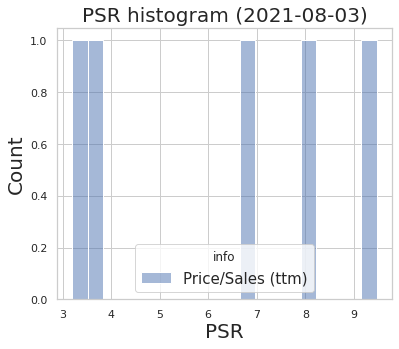

PSR sorted list (<function today at 0x7f7e9f2ab0d0>)


info,Market Cap,Previous Close,1y Target Est,Price/Sales (ttm),PE Ratio (TTM),Price/Book (mrq),Earnings Date
Ticker,,,,,,,
FB,9.927250e+11,351.95,386.47,9.47,26.15,7.20,"Oct 27, 2021 - Nov 01, 2021"
GOOG,1.809000e+12,2719.79,2625.00,8.21,29.48,7.64,NaN
AAPL,2.404000e+12,145.52,159.34,6.93,28.47,37.48,"Oct 27, 2021 - Nov 01, 2021"
AMZN,1.679000e+12,3331.48,4241.33,3.79,57.99,14.67,"Oct 27, 2021 - Nov 01, 2021"
MS,1.769810e+11,96.23,98.53,3.20,12.79,1.83,"Oct 13, 2021 - Oct 18, 2021"


In [7]:
df_all=mi.get_all_data(gafam, table=False)
mi.plot_eps(gafam,last=20) # show EPS history within last 20 quarters
ret=mi.plot_valuation(gafam)

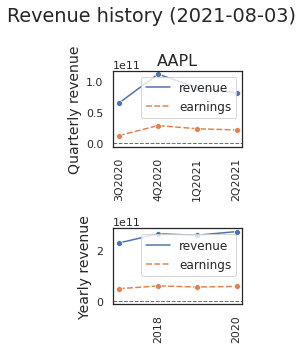

{'quarterly_results':      date  actual  estimate Ticker
 0  2Q2020    0.64      0.51   AAPL
 1  3Q2020    0.73      0.70   AAPL
 2  4Q2020    1.68      1.41   AAPL
 3  1Q2021    1.40      0.99   AAPL,
 'yearly_revenue_earnings':    date       revenue     earnings Ticker
 0  2017  229234000000  48351000000   AAPL
 1  2018  265595000000  59531000000   AAPL
 2  2019  260174000000  55256000000   AAPL
 3  2020  274515000000  57411000000   AAPL,
 'quarterly_revenue_earnings':      date       revenue     earnings Ticker
 0  3Q2020   64698000000  12673000000   AAPL
 1  4Q2020  111439000000  28755000000   AAPL
 2  1Q2021   89584000000  23630000000   AAPL
 3  2Q2021   81434000000  21744000000   AAPL}

In [8]:
mi.plot_revenue("AAPL")

In [9]:
cf_y=si.get_cash_flow("AAPL")
cf_q=si.get_cash_flow("AAPL",yearly=False)

bs_y=si.get_balance_sheet("AAPL")
bs_q=si.get_balance_sheet("AAPL",yearly=False)

In [10]:
display(cf_y)
#display(cf_q)

endDate,2020-09-26,2019-09-28,2018-09-29,2017-09-30
Breakdown,,,,
investments,5335000000,58093000000,30845000000,-33542000000
changeToLiabilities,-1981000000,-2548000000,9172000000,8373000000
totalCashflowsFromInvestingActivities,-4289000000,45896000000,16066000000,-46446000000
netBorrowings,2499000000,-7819000000,432000000,29014000000
totalCashFromFinancingActivities,-86820000000,-90976000000,-87876000000,-17974000000
changeToOperatingActivities,881000000,-896000000,30016000000,-8480000000
issuanceOfStock,880000000,781000000,669000000,555000000
netIncome,57411000000,55256000000,59531000000,48351000000
changeInCash,-10435000000,24311000000,5624000000,-195000000


<AxesSubplot:xlabel='endDate'>

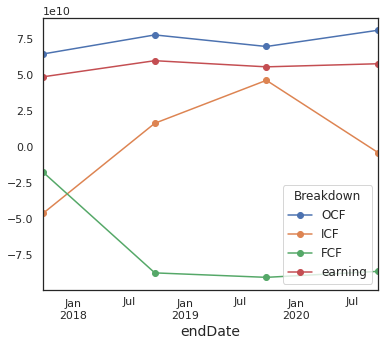

In [17]:
table_cf = {
    "totalCashFromOperatingActivities": "OCF", #"operating cash flows",
    "totalCashflowsFromInvestingActivities": "ICF", #"investing cash flows ",
    "totalCashFromFinancingActivities": "FCF", #"financing cash flows",
    "netIncome" : "earning" # "net income"
}
df_cfy=cf_y.loc[
    [
        "totalCashFromOperatingActivities",
        "totalCashflowsFromInvestingActivities",
        "totalCashFromFinancingActivities",
        "netIncome"
    ]
].T.rename(columns=table_cf)

n_col=len(df_cfy.columns)
df_cfy.plot(style=['o-']*n_col)

In [18]:
#display(bs_y)
display(bs_q)

endDate,2021-06-26,2021-03-27,2020-12-26,2020-09-26
Breakdown,,,,
totalLiab,265560000000,267980000000,287830000000,258549000000
totalStockholderEquity,64280000000,69178000000,66224000000,65339000000
otherCurrentLiab,51306000000,53255000000,55899000000,47867000000
totalAssets,329840000000,337158000000,354054000000,323888000000
commonStock,54989000000,54203000000,51744000000,50779000000
otherCurrentAssets,13641000000,13376000000,13687000000,11264000000
retainedEarnings,9233000000,15261000000,14301000000,14966000000
otherLiab,38354000000,39853000000,43042000000,46108000000
treasuryStock,58000000,-286000000,179000000,-406000000


In [19]:
rev=si.get_earnings("AAPL")

In [20]:
rev

{'quarterly_results':      date  actual  estimate
 0  2Q2020    0.64      0.51
 1  3Q2020    0.73      0.70
 2  4Q2020    1.68      1.41
 3  1Q2021    1.40      0.99,
 'yearly_revenue_earnings':    date       revenue     earnings
 0  2017  229234000000  48351000000
 1  2018  265595000000  59531000000
 2  2019  260174000000  55256000000
 3  2020  274515000000  57411000000,
 'quarterly_revenue_earnings':      date       revenue     earnings
 0  3Q2020   64698000000  12673000000
 1  4Q2020  111439000000  28755000000
 2  1Q2021   89584000000  23630000000
 3  2Q2021   81434000000  21744000000}

In [21]:
inc=si.get_income_statement("AAPL")

In [16]:
inc

endDate,2020-09-26,2019-09-28,2018-09-29,2017-09-30
Breakdown,,,,
researchDevelopment,18752000000,16217000000,14236000000,11581000000
effectOfAccountingCharges,None,None,None,None
incomeBeforeTax,67091000000,65737000000,72903000000,64089000000
minorityInterest,None,None,None,None
netIncome,57411000000,55256000000,59531000000,48351000000
sellingGeneralAdministrative,19916000000,18245000000,16705000000,15261000000
grossProfit,104956000000,98392000000,101839000000,88186000000
ebit,66288000000,63930000000,70898000000,61344000000
operatingIncome,66288000000,63930000000,70898000000,61344000000
